In [1]:
import requests
import base64
import json
import cred
from os import getenv
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import seaborn as sns

In [2]:
# Step 1 - Authorization : to make a request, send the parameters below
url = "https://accounts.spotify.com/api/token"  # url endpoint 
headers = {}                                    # to send access tokens 
data = {}                                       # part of the payload


In [3]:
cid = getenv("SPOTIPY_CLIENT_ID")
secret = getenv("SPOTIPY_CLIENT_SECRET")

In [4]:
def getAccessToken(cid, secret):
    # Encode as Base64
    message = f"{cid}:{secret}"
    messageBytes = message.encode('ascii')       # Convert into bytes
    base64Bytes = base64.b64encode(messageBytes) # base64 encode it
    base64Message = base64Bytes.decode('ascii')  # convert bytes back to a string

    headers['Authorization'] = f"Basic {base64Message}"
    data['grant_type'] = "client_credentials"

    res = requests.post(url, headers=headers, data=data) 
    responseObject = res.json()
    accessToken = responseObject['access_token']

    return accessToken

In [5]:
def getPlaylistTracks(token, playlistID):
    
    playlistUrl = f"https://api.spotify.com/v1/playlists/{playlistId}"
    getHeader = {"Authorization": "Bearer " + token}
    res = requests.get(url=playlistUrl, headers=getHeader)
    playlistObject = res.json()

    return playlistObject 

In [6]:
# API requests 
token = getAccessToken(cid, secret)
playlistId = '4hOKQuZbraPDIfaGbM3lKI?si=78ee28fb02e1448b'
tracklist = getPlaylistTracks(token, playlistId)

with open('tracklist.json', 'w') as f:
    json.dump(tracklist, f)

In [7]:
# Extract long tracks and put them into a dictionary 

Tracks = []
Duration = []

for t in tracklist['tracks']['items']:
    songNames = t['track']['name']
    duration = t['track']['duration_ms']
    Tracks.append(songNames)
    minutes=(duration/(1000*60))%60
    minutes = int(minutes)
    Duration.append(minutes)

L_Tracks = {'songName': Tracks, 'Duration' : Duration}
#print(L_Tracks)


<AxesSubplot:>

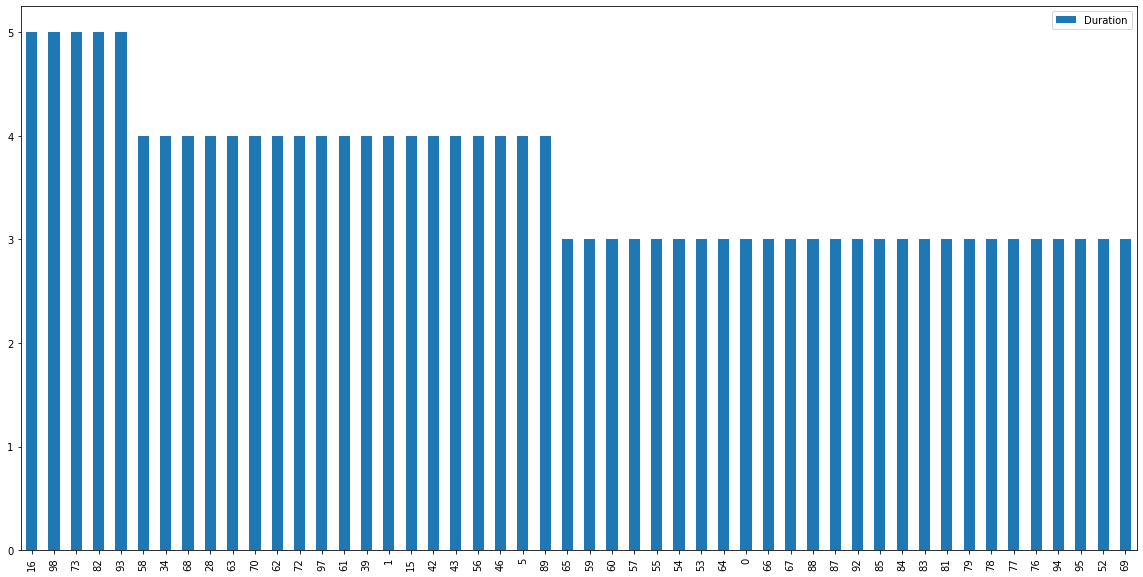

In [8]:
# Long Tracks
df = pd.DataFrame.from_dict(L_Tracks)
df.columns=['Tracks', 'Duration']

df = df.sort_values(by=['Duration'], ascending=False)  
df_top50 = df.head(50)
df_top50.plot(kind='bar', figsize=(20,10))

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U14'), dtype('float64')) -> None

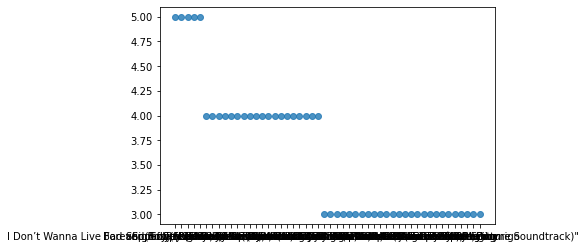

In [10]:
ax = sns.regplot(x='Tracks', y='Duration', data=df_top50)
# Recent release - order by date

In [41]:
r_dates = []
for t in tracklist['tracks']['items']:
    relase_dates = t['track']['album']['release_date']
    r_dates.append(relase_dates)

    
    
    

2017-04-17
2017-04-27
2017-03-03
2017-04-14
2017-08-04
2017-04-07
2017-02-23
2017-02-16
2017-02-23
2017-05-11
2017-04-20
2016-11-17
2017-03-16
2017-01-13
2017-04-20
2017-03-18
2017-05-12
2017-03-24
2017-04-28
2017-04-21
2017
2017-04-14
2017-01-13
2017-01-27
2017-03-03
2017-02-24
2016-12-09
2017-03-31
2017-05-05
2017-04-27
2017-02-24
2017-03-03
2016-09-16
2017-04-16
2016-12-02
2017-03-16
2017-04-04
2017-01-31
2017-04-27
2016-10-21
2017-04-07
2016-10-14
2017-05-12
2016-12-09
2017-02-14
2017-04-14
2016-11-24
2017-01-20
2016-12-09
2017-05-04
2016-11-04
2017-04-28
2017-03-31
2016-10-28
2017-03-18
2017-04-14
2017-03-17
2015-04-06
2016-06-17
2017-03-09
2017-05-12
2016-07-29
2017-03-03
2017-03-31
2017-03-23
2017-04-14
2017-04-28
2016
2016-09-16
2016-11-25
2017-08-04
2016-06-24
2017-03-03
2017-04-07
2016-05-06
2017-02-01
2016-09-16
2017-04-07
2017-02-10
2017-03-18
2017-04-07
2017-02-03
2017-04-07
2016-08-05
2016-09-30
2016-11-18
2017-02-20
2017-04-21
2017-01-13
2017-04-28
2017-04-28
2016-07-15
